In [60]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv("C:/Users/User/OneDrive/Desktop/iris_data.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [62]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [63]:
df['variety']=df['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
x=df.drop('variety',axis=1).values.tolist()
y=df['variety'].values

In [65]:

k=3
classifier=KMeans(n_clusters=k,n_init=10)
classifier.fit(x)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [66]:
feature_names=['sepal.length','sepal.width','petal.length','petal.width']
df['cluster']=classifier.labels_

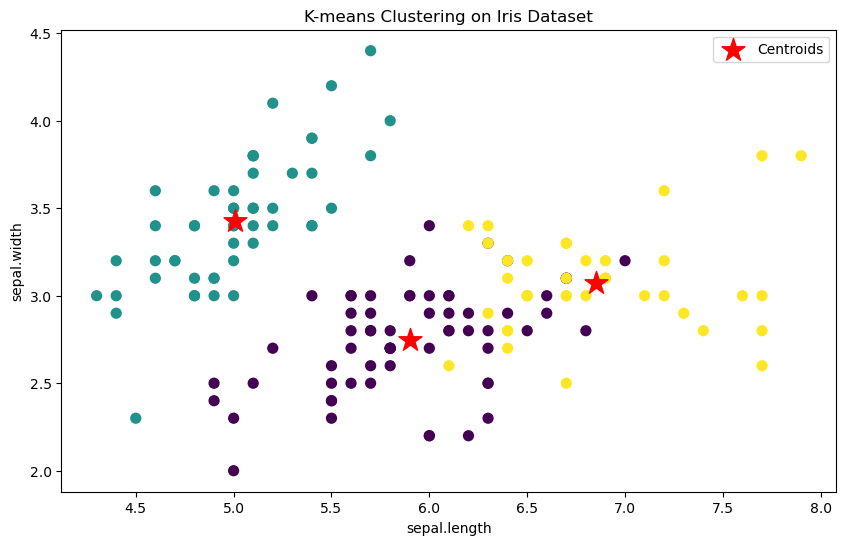

Cluster Centers:
   sepal.length  sepal.width  petal.length  petal.width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.428000      1.462000     0.246000
2      6.850000     3.073684      5.742105     2.071053


In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0],df.iloc[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-means Clustering on Iris Dataset')
plt.legend()
plt.show()

print("Cluster Centers:")
print(pd.DataFrame(classifier.cluster_centers_, columns=feature_names))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

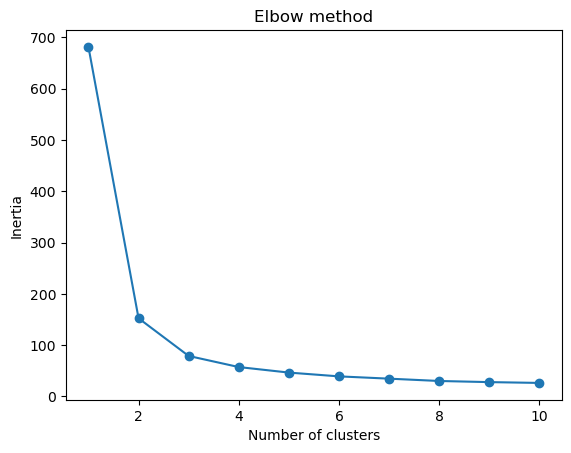

In [57]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()